In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import csv
import pickle
import math

In [2]:
def df_origen(origen): 
    
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)

    df = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    #df.head(10)
    
    df.index.freq = df.index.inferred_freq
    df_Dia = df.resample('24H').sum()

    mean_df = df_Dia.mean()
    mean_dict = mean_df.to_dict()
    main_lines = list(dict.keys(dict(filter(lambda x: x[1] > 2000, mean_dict.items())))) #Obtengo las claves de las columnas con un promedio por dia mayor a 8000        
    
    
    main_lines.insert(0,"ds")    
    df_main_lines = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=main_lines)

    df_main_lines['Año'] = df_main_lines.index.year                                
    df_main_lines['Mes'] = df_main_lines.index.month                               
    df_main_lines['Dia'] = df_main_lines.index.day_name()
    df_main_lines['ID_Dia'] = df_main_lines.index.dayofweek
    df_main_lines['Hora'] = df_main_lines.index.hour
    df_main_lines['WeekNo'] = df_main_lines.index.isocalendar().week    
    
    return df, lista, df_Dia, main_lines, df_main_lines

In [3]:
origen = "2807918"
df,lista, df_Dia, main_lines, df_main_lines = df_origen(origen)
#main_linesdf_dia("2807901",lista)
#df2.iloc[:,100:1000]
df.shape

(1824, 186)

# 16 Marzo 2020 - 15 Abril 2020

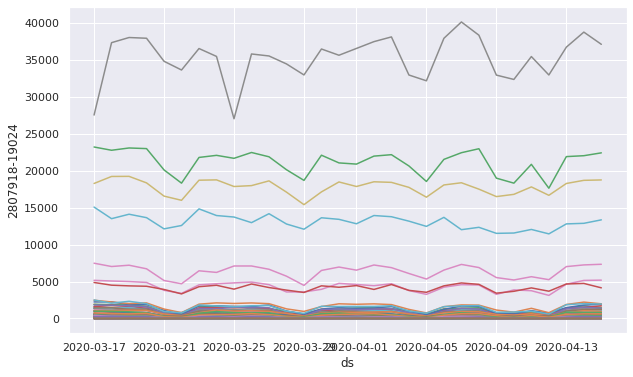

In [4]:
sb.set(rc = {'figure.figsize':(10,6)})
for trayecto in lista:
    x=trayecto.startswith(origen)
    if x==True:
        graph=sb.lineplot(x="ds", y=trayecto, data=df_Dia.loc['2020-03-16':'2020-04-15'],legend='brief',label=trayecto)
        graph.get_legend().remove()

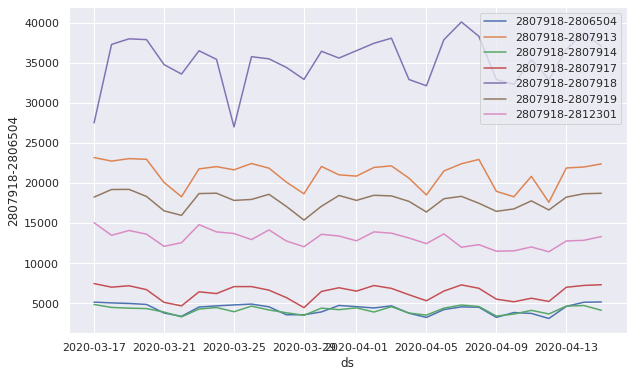

In [5]:
sb.set(rc = {'figure.figsize':(10,6)})
for trayecto in main_lines:
    x=trayecto.startswith(origen)
    if x==True:
        sb.lineplot(x="ds", y=trayecto, data=df_Dia.loc['2020-03-16':'2020-04-15'],legend='brief',label=trayecto)        

In [6]:
print(main_lines)

['ds', '2807918-2806504', '2807918-2807913', '2807918-2807914', '2807918-2807917', '2807918-2807918', '2807918-2807919', '2807918-2812301']


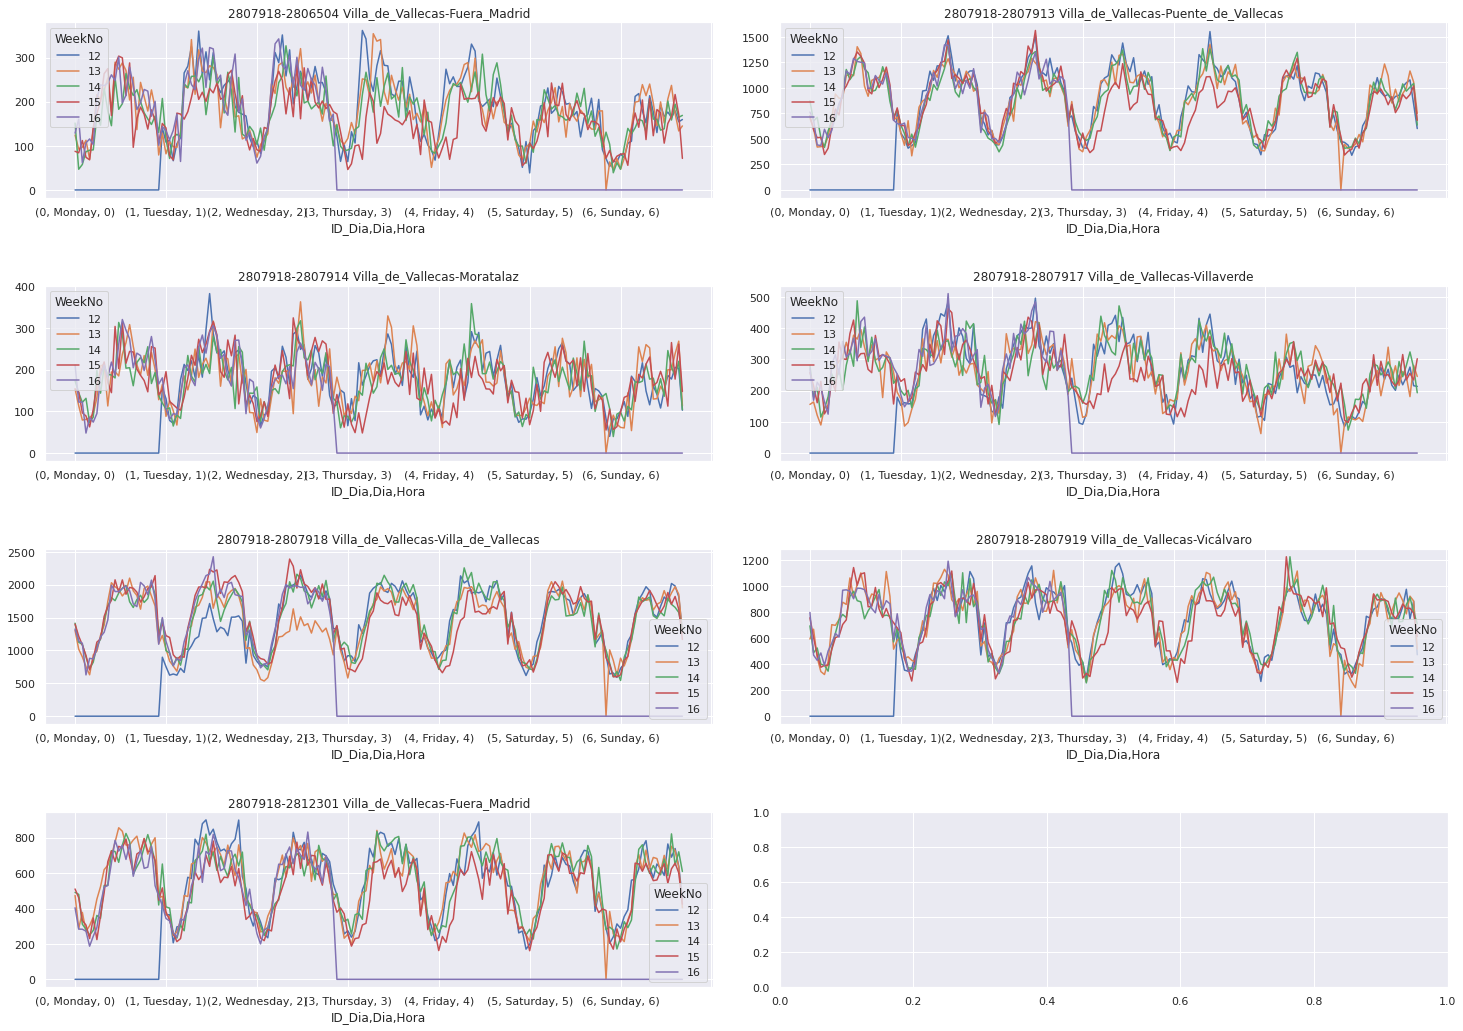

In [7]:
data1=df_main_lines.loc['2020-03-16':'2020-04-15']
cont=1
for line in main_lines:    
    if line=="ds":        
        continue    

    globals()[f"table1_{cont}"] = pd.pivot_table(data1, values=line, index=['ID_Dia','Dia','Hora'],
                            columns=['WeekNo'],fill_value=0)
    cont=cont+1
    
sb.set(rc = {'figure.figsize':(15,8)})
rows = math.ceil((len(main_lines)-1)/2)
cont2=1
ax=0
for line in main_lines:
    origen = line[0:7]
    destino = line[8:15]
    lines_names = {"2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}
    
    if line=="ds":        
        fig, axes = plt.subplots(nrows=rows, ncols=2)
        ax_list = fig.axes
        plt.subplots_adjust(left=0.001, bottom=None, right=1.3, top=1.8, wspace=0.1, hspace=0.5)
        continue
    globals()[f"table1_{cont2}"].plot(ax=ax_list[ax]); ax_list[ax].set_title(line+" "+lines_names[origen]+"-"+lines_names[destino])
    cont2=cont2+1   
    ax=ax+1
    

# 16 Abril 2020 - 15 Mayo 2020

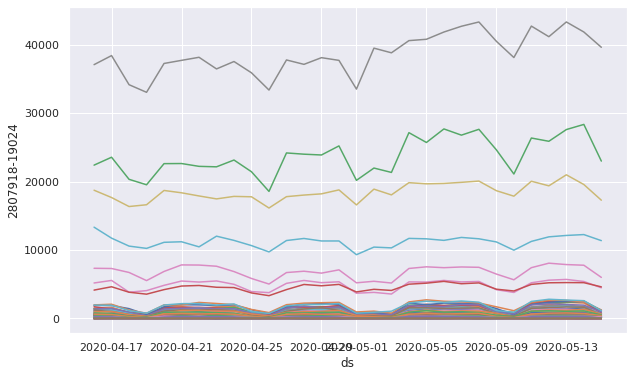

In [8]:
sb.set(rc = {'figure.figsize':(10,6)})
for trayecto in lista:
    x=trayecto.startswith(origen)
    if x==True:
        graph=sb.lineplot(x="ds", y=trayecto, data=df_Dia.loc['2020-04-16':'2020-05-15'],legend='brief',label=trayecto)
        graph.get_legend().remove()

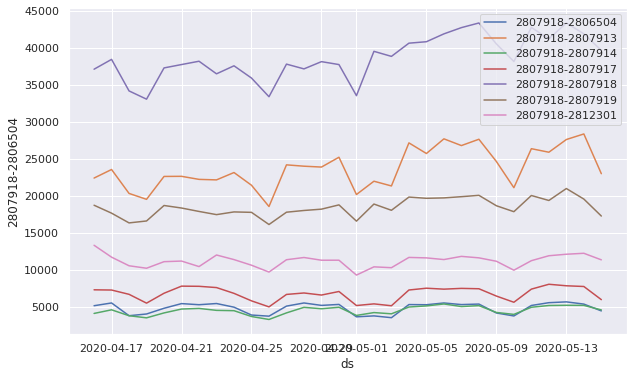

In [9]:
sb.set(rc = {'figure.figsize':(10,6)})
for trayecto in main_lines:
    x=trayecto.startswith(origen)
    if x==True:
        sb.lineplot(x="ds", y=trayecto, data=df_Dia.loc['2020-04-16':'2020-05-15'],legend='brief',label=trayecto)        

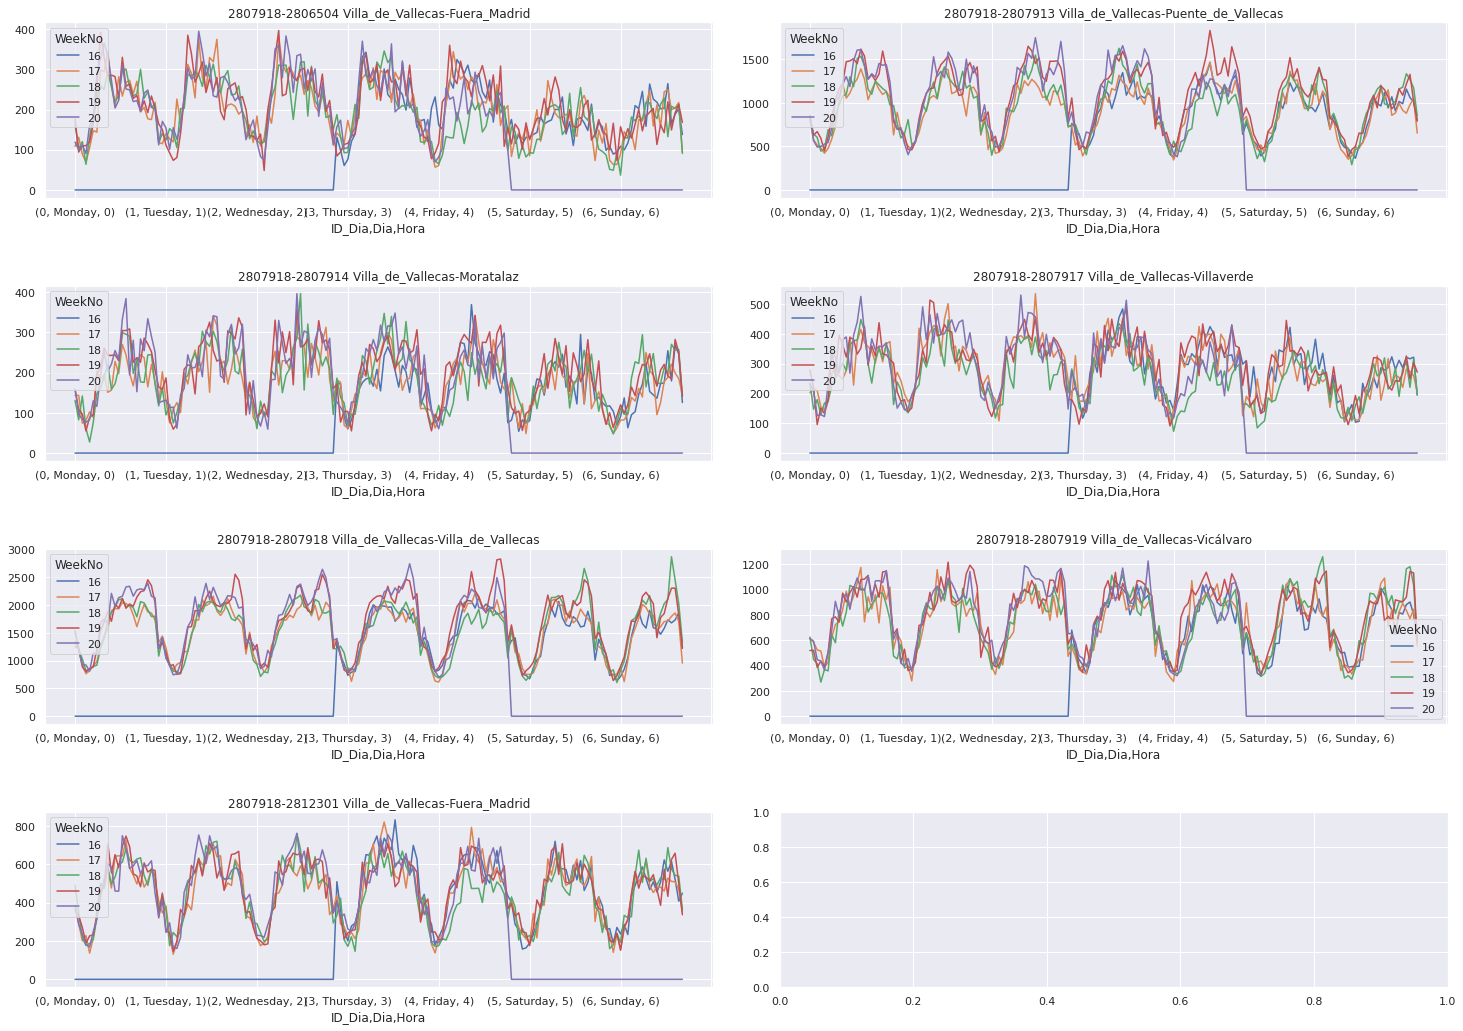

In [10]:
data1=df_main_lines.loc['2020-04-16':'2020-05-15']
cont=1
for line in main_lines:    
    if line=="ds":        
        continue    

    globals()[f"table1_{cont}"] = pd.pivot_table(data1, values=line, index=['ID_Dia','Dia','Hora'],
                            columns=['WeekNo'],fill_value=0)
    cont=cont+1
    
sb.set(rc = {'figure.figsize':(15,8)})
rows = math.ceil((len(main_lines)-1)/2)
cont2=1
ax=0
for line in main_lines:
    origen = line[0:7]
    destino = line[8:15]
    lines_names = {"2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}
    
    if line=="ds":        
        fig, axes = plt.subplots(nrows=rows, ncols=2)
        ax_list = fig.axes
        plt.subplots_adjust(left=0.001, bottom=None, right=1.3, top=1.8, wspace=0.1, hspace=0.5)
        continue
    globals()[f"table1_{cont2}"].plot(ax=ax_list[ax]); ax_list[ax].set_title(line+" "+lines_names[origen]+"-"+lines_names[destino])
    cont2=cont2+1   
    ax=ax+1
    

# 16 Mayo 2020 - 31 Mayo 2020

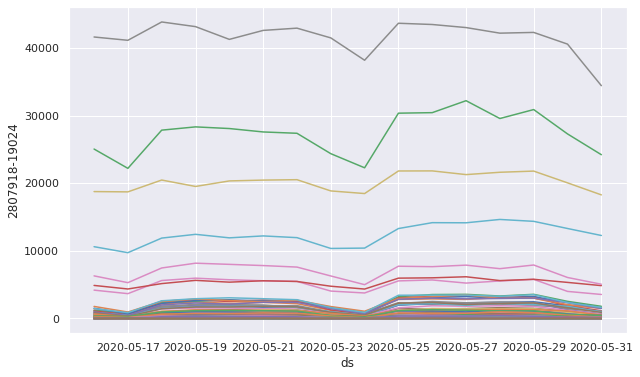

In [11]:
sb.set(rc = {'figure.figsize':(10,6)})
for trayecto in lista:
    x=trayecto.startswith(origen)
    if x==True:
        graph=sb.lineplot(x="ds", y=trayecto, data=df_Dia.loc['2020-05-16':'2020-05-31'],legend='brief',label=trayecto)
        graph.get_legend().remove()

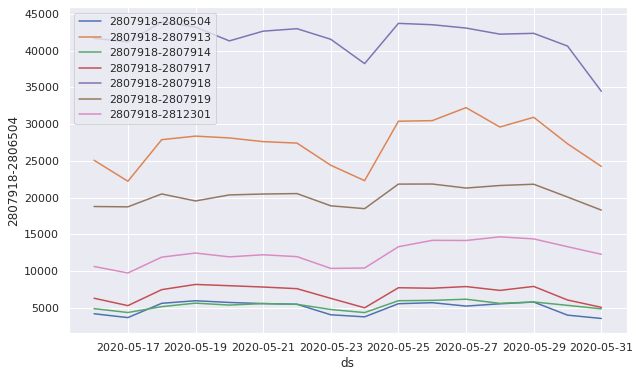

In [12]:
sb.set(rc = {'figure.figsize':(10,6)})
for trayecto in main_lines:
    x=trayecto.startswith(origen)
    if x==True:
        sb.lineplot(x="ds", y=trayecto, data=df_Dia.loc['2020-05-16':'2020-05-31'],legend='brief',label=trayecto)        

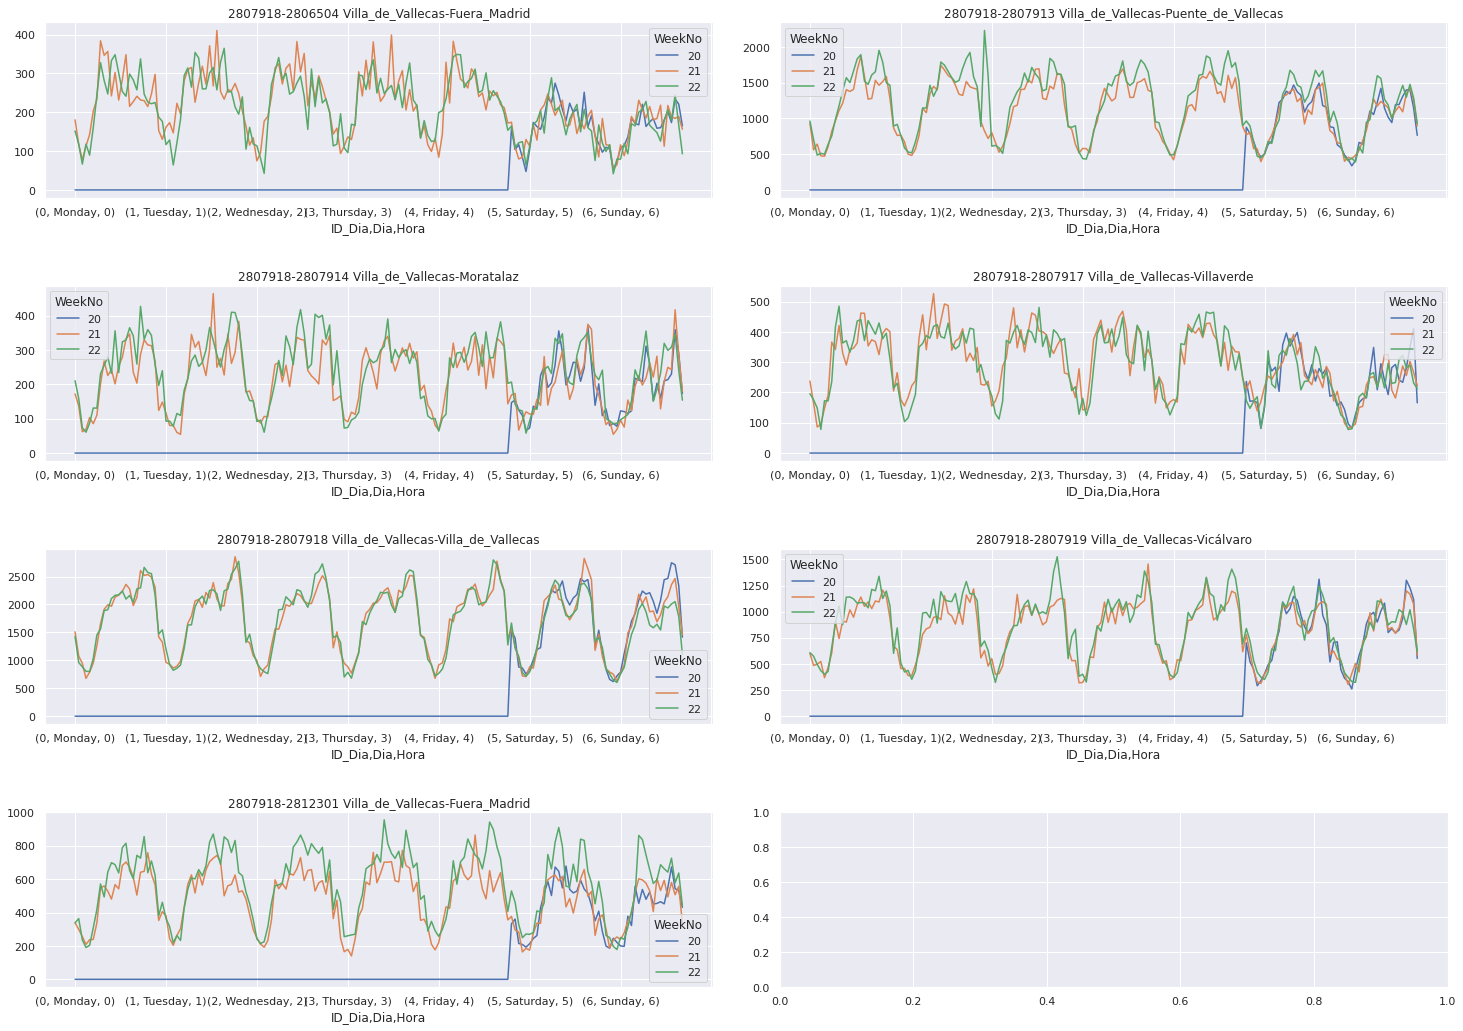

In [13]:
data1=df_main_lines.loc['2020-05-16':'2020-05-31']
cont=1
for line in main_lines:    
    if line=="ds":        
        continue    

    globals()[f"table1_{cont}"] = pd.pivot_table(data1, values=line, index=['ID_Dia','Dia','Hora'],
                            columns=['WeekNo'],fill_value=0)
    cont=cont+1
    
sb.set(rc = {'figure.figsize':(15,8)})
rows = math.ceil((len(main_lines)-1)/2)
cont2=1
ax=0
for line in main_lines:
    origen = line[0:7]
    destino = line[8:15]
    lines_names = {"2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}
    
    if line=="ds":        
        fig, axes = plt.subplots(nrows=rows, ncols=2)
        ax_list = fig.axes
        plt.subplots_adjust(left=0.001, bottom=None, right=1.3, top=1.8, wspace=0.1, hspace=0.5)
        continue
    globals()[f"table1_{cont2}"].plot(ax=ax_list[ax]); ax_list[ax].set_title(line+" "+lines_names[origen]+"-"+lines_names[destino])
    cont2=cont2+1   
    ax=ax+1
    